<a href="https://colab.research.google.com/github/shashankcuber/Tnsflow-basics/blob/master/N_armed_bandit_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing the necessary libraries

import numpy as np
import random
import matplotlib.pyplot as plt

np.random.seed(5)

In [0]:
#declare no. of arms or lottery machine
n=2 #10 armed bandit

#array filled with random floating values that describes the probability
#of action of that arm
arms=np.random.rand(n)
print(arms)
eps=0.1 #probability of action to be chosen(exploration)


[0.27408646 0.41423502]


In [0]:
#reward function
#we generate a random float value and check if its less than the prob 
#of that arm
#if the conditon is true we increment the reward by 1 
#Why 1 is added think?
def reward(prob):
  reward=0
  for i in range(10):
    if random.random()<prob:
      reward+=1
  return reward


In [0]:
#initialise the memory array for action value
av=np.array([np.random.randint(0,n+1),0]).reshape(1,2)
#av=np.append(av,[[1,3]],axis=0)
print (av)

[[2 0]
 [1 3]]


In [0]:
#greedy method to select the best arm

def bestarm(a):
  bestarm=0
  bestmean=0
  
  for u in a:
    #caluclating the mean reward for each action
    #print(u[0])
    #print(np.where(a[:,0]==u[0]))
    avg=np.mean(a[np.where(a[:,0]==u[0])][:,1])
    
    if(bestmean<avg):
      bestmean=avg
      bestarm=u[0]
        
  return bestarm


#print(bestarm(av)) 

0.27408646199222464
1
0.4142350190810513
1
0.27408646199222464
0
0.4142350190810513
1
0.4142350190810513
0
0.27408646199222464
0
0.27408646199222464
0
0.4142350190810513
1
0.27408646199222464
1
0.4142350190810513
1
0.27408646199222464
0
0.4142350190810513
0
0.4142350190810513
0
0.27408646199222464
1
0.27408646199222464
0
0.27408646199222464
1
0.27408646199222464
1
0.4142350190810513
0
0.4142350190810513
0
0.27408646199222464
1
0.4142350190810513
1
0.27408646199222464
1
0.4142350190810513
1
0.27408646199222464
1
0.27408646199222464
0
0.27408646199222464
1
0.27408646199222464
0
0.4142350190810513
1
0.4142350190810513
0
0.4142350190810513
1
0.27408646199222464
1
0.4142350190810513
0
0.4142350190810513
1
0.4142350190810513
1
0.4142350190810513
1
0.27408646199222464
0
0.4142350190810513
0
0.27408646199222464
1
0.4142350190810513
0
0.4142350190810513
0
0.4142350190810513
1
0.4142350190810513
0
0.4142350190810513
1
0.4142350190810513
0
0.4142350190810513
1


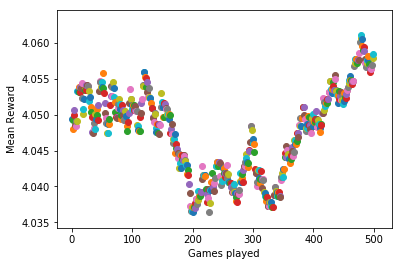

In [0]:
#plotting the main loop to determine the best mean reward against the no. of times the game is played

plt.xlabel("Games played")
plt.ylabel("Mean Reward")

for i in range(500):
  #greedy exploitation
  if random.random()> eps: 
    choice=bestarm(av)
    thisav=np.array([[choice,reward(arms[choice])]])
    av=np.concatenate((av,thisav),axis=0)
  
  else: #greedy exploration
    print(np.random.choice(arms))
    choice=np.where(arms==np.random.choice(arms))[0][0]
    print(choice)
    thisav=np.array([[choice,reward(arms[choice])]])
    av=np.concatenate((av,thisav),axis=0)
  #calculating the mean
  runningmean=np.mean(av[:,1])
  plt.scatter(i,runningmean)